Importing useful libraries

In [1]:
# load useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats
from scipy.stats import norm 
import math
from matplotlib import gridspec
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

Data Loading & Looking over the Data

In [ ]:
#!git clone https://github.com/iampaulanca/USD-AAI-501-Group-3.git
#!cd AAI-501-Introduction to AI

In [2]:
# reading in the stroke file & seeing first few rows of data
student = pd.read_csv('Student_performance_data.csv')
student.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [3]:
# dropping unncecessary columns
# removing GPA here due to discussions regarding when to remove
student.drop(columns=['StudentID','GPA'], inplace=True)

In [4]:
# descriptive statistics
student.describe()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,2.983696
std,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,1.233908
min,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,4.000000
max,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [5]:
# count of missing values per column
student.isnull().sum()

Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GradeClass           0
dtype: int64

In [6]:
# understanding data types
student.dtypes

Age                    int64
Gender                 int64
Ethnicity              int64
ParentalEducation      int64
StudyTimeWeekly      float64
Absences               int64
Tutoring               int64
ParentalSupport        int64
Extracurricular        int64
Sports                 int64
Music                  int64
Volunteering           int64
GradeClass           float64
dtype: object

Examining the Data Visually with bar plots and histograms

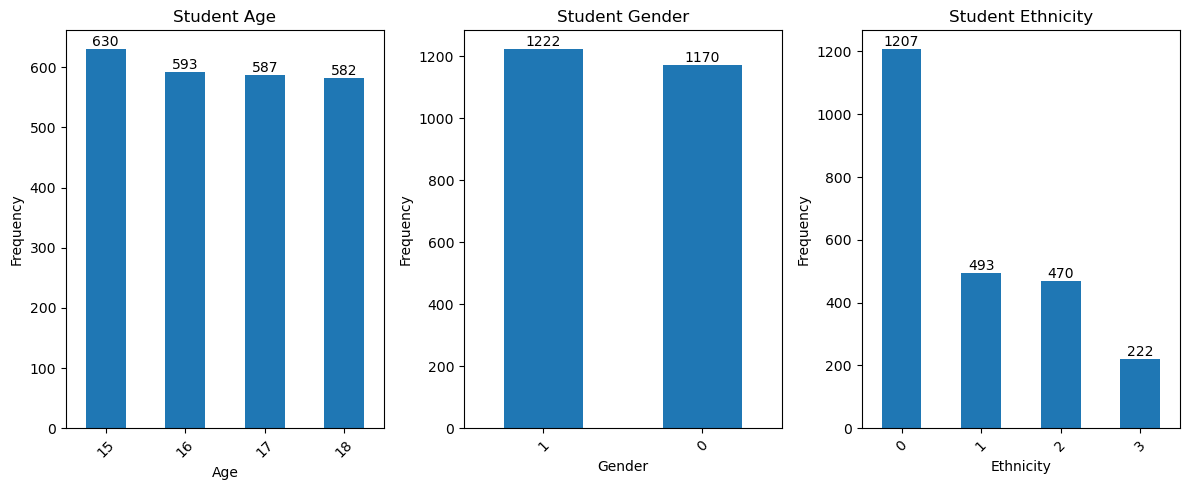

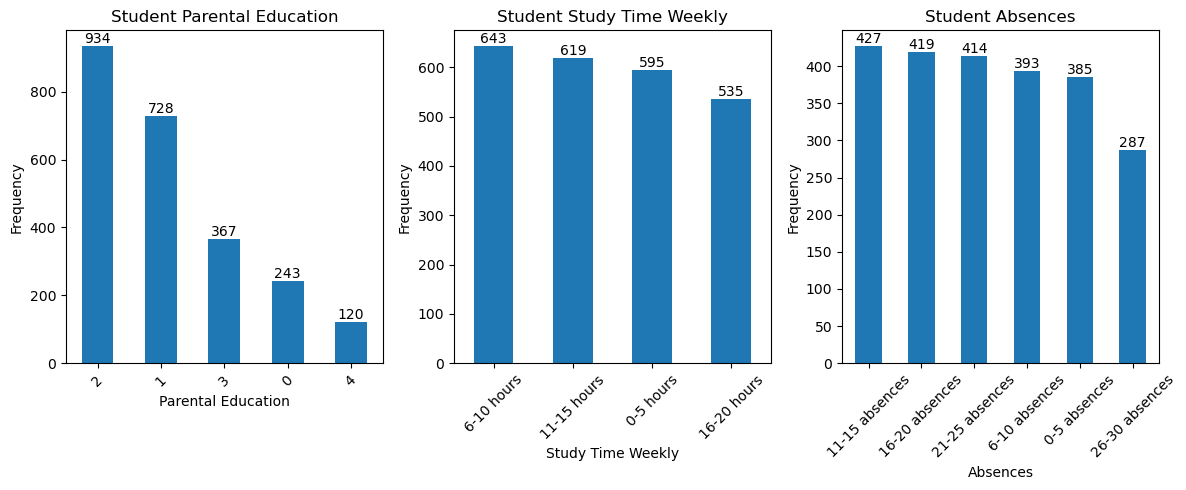

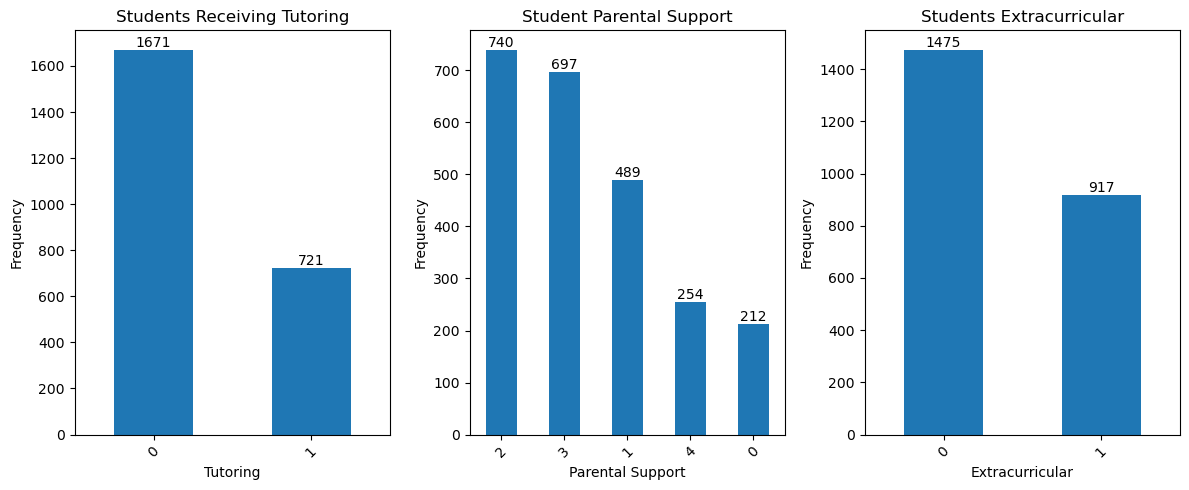

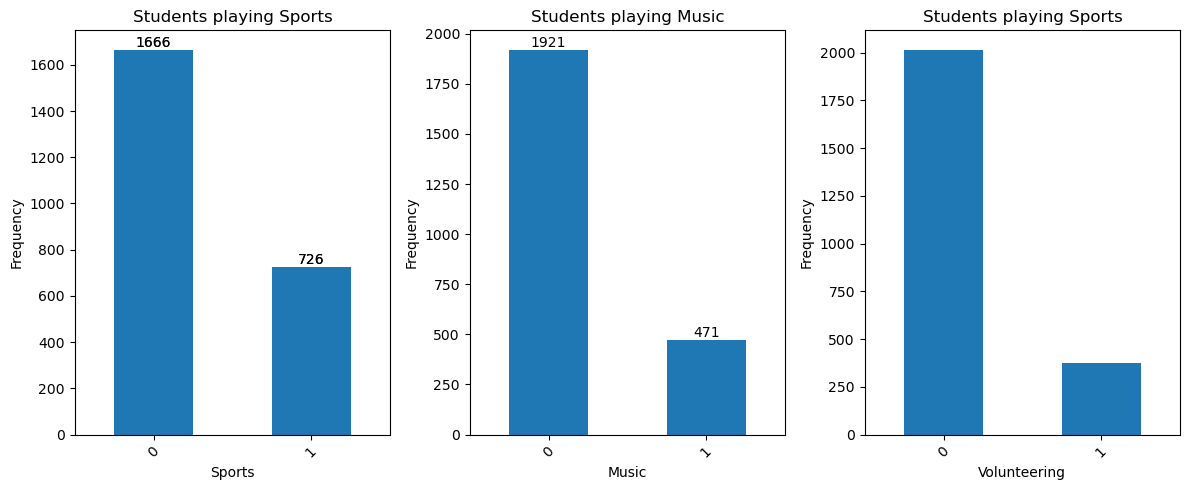

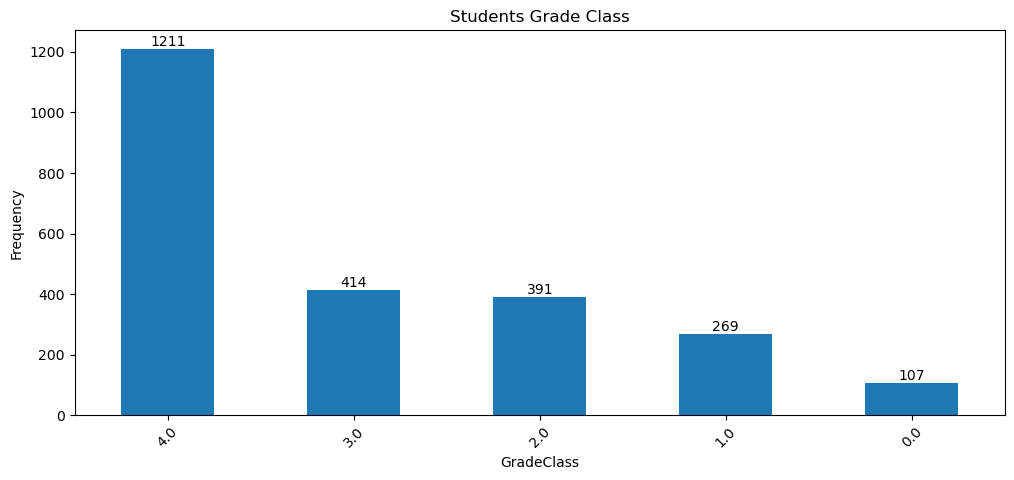

In [7]:
# visualize distribution of each variable
# Visualize distribution of each variable --> referencing module 5 lab
fig1, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 5))
fig2, (ax4, ax5, ax6) = plt.subplots(1, 3, figsize=(12, 5))
fig3, (ax7, ax8, ax9) = plt.subplots(1, 3, figsize=(12, 5))
fig4, (ax10, ax11, ax12) = plt.subplots(1, 3, figsize=(12, 5))
fig5, ax13 = plt.subplots(1, 1, figsize=(12, 5))

# setting up bar plots for data that has discrete values
# for data labels, had to google how to add data labels when using value_counts
#---------------------------------------------------------------------------------
# Age
age = student['Age'].value_counts().plot(ax=ax1, kind='bar', xlabel='Age', ylabel='Frequency', title='Student Age', rot=45)
# data labels
for a in age.containers:
    age.bar_label(a, fmt='%d')
#---------------------------------------------------------------------------------
# Gender
gender = student['Gender'].value_counts().plot(ax=ax2, kind='bar', xlabel='Gender', ylabel='Frequency', title='Student Gender', rot=45)
# data labels
for g in gender.containers:
    gender.bar_label(g, fmt='%d')
#---------------------------------------------------------------------------------
# Ethnicity
ethnicity = student['Ethnicity'].value_counts().plot(ax=ax3, kind='bar', xlabel='Ethnicity', ylabel='Frequency', title='Student Ethnicity', rot=45)
# data labels
for e in ethnicity.containers:
    ethnicity.bar_label(e, fmt='%d')
#---------------------------------------------------------------------------------
# Parental Education
pe = student['ParentalEducation'].value_counts().plot(ax=ax4, kind='bar', xlabel='Parental Education', ylabel='Frequency', title='Student Parental Education', rot=45)
# data labels
for p in pe.containers:
    pe.bar_label(p, fmt='%d')
#---------------------------------------------------------------------------------
# Study Time Weekly

# googled how to add bins for study time so the graph was legible  --> used genAI to help figure out how to create bins and labels and binning the data
# defining the bins
bins = [0, 5, 10, 15, 20]
labels = ['0-5 hours', '6-10 hours', '11-15 hours', '16-20 hours']
# binning the data
student['StudyTimeBins'] = pd.cut(student['StudyTimeWeekly'], bins=bins, labels=labels)

stm = student['StudyTimeBins'].value_counts().plot(ax=ax5, kind='bar', xlabel='Study Time Weekly', ylabel='Frequency', title='Student Study Time Weekly', rot=45)
# data labels
for s in stm.containers:
    stm.bar_label(s, fmt='%d')
#---------------------------------------------------------------------------------
# Absences
# googled how to add bins for study time so the graph was legible  --> used genAI to help figure out how to create bins and labels and binning the data
# defining the bins
bins = [0, 5, 10, 15, 20, 25, 30]
labels = ['0-5 absences', '6-10 absences', '11-15 absences', '16-20 absences', '21-25 absences', '26-30 absences']
# binning the data
student['AbsenceBins'] = pd.cut(student['Absences'], bins=bins, labels=labels)

absence = student['AbsenceBins'].value_counts().plot(ax=ax6, kind='bar', xlabel='Absences', ylabel='Frequency', title='Student Absences', rot=45)
# data labels
for ab in absence.containers:
    absence.bar_label(ab, fmt='%d')
#---------------------------------------------------------------------------------
# Tutoring
tutoring = student['Tutoring'].value_counts().plot(ax=ax7, kind='bar', xlabel='Tutoring', ylabel='Frequency', title='Students Receiving Tutoring', rot=45)
# data labels
for t in tutoring.containers:
    tutoring.bar_label(t, fmt='%d')
#---------------------------------------------------------------------------------
# ParentalSupport
ps = student['ParentalSupport'].value_counts().plot(ax=ax8, kind='bar', xlabel='Parental Support', ylabel='Frequency', title='Student Parental Support', rot=45)
# data labels
for sp in ps.containers:
    ps.bar_label(sp, fmt='%d')
#---------------------------------------------------------------------------------
# Extracurricular
extracurricular = student['Extracurricular'].value_counts().plot(ax=ax9, kind='bar', xlabel='Extracurricular', ylabel='Frequency', title='Students Extracurricular', rot=45)
# data labels
for ex in extracurricular.containers:
    extracurricular.bar_label(ex, fmt='%d')
#---------------------------------------------------------------------------------
# Sports
sports = student['Sports'].value_counts().plot(ax=ax10, kind='bar', xlabel='Sports', ylabel='Frequency', title='Students playing Sports', rot=45)
# data labels
for spo in sports.containers:
    sports.bar_label(spo, fmt='%d')
#---------------------------------------------------------------------------------
# Music
music = student['Music'].value_counts().plot(ax=ax11, kind='bar', xlabel='Music', ylabel='Frequency', title='Students playing Music', rot=45)
# data labels
for m in music.containers:
    music.bar_label(m, fmt='%d')
#---------------------------------------------------------------------------------
# Volunteering
volunteer = student['Volunteering'].value_counts().plot(ax=ax12, kind='bar', xlabel='Volunteering', ylabel='Frequency', title='Students playing Sports', rot=45)
# data labels
for spo in sports.containers:
    sports.bar_label(spo, fmt='%d')
#---------------------------------------------------------------------------------
# GradeClass
gradec = student['GradeClass'].value_counts().plot(ax=ax13, kind='bar', xlabel='GradeClass', ylabel='Frequency', title='Students Grade Class', rot=45)
# data labels
for gc in gradec.containers:
    gradec.bar_label(gc, fmt='%d')
#---------------------------------------------------------------------------------

fig1.tight_layout()
fig2.tight_layout()
fig3.tight_layout()
fig4.tight_layout()


plt.show()

Examining the Relationship between Variables and GradeClass (not all variables yet

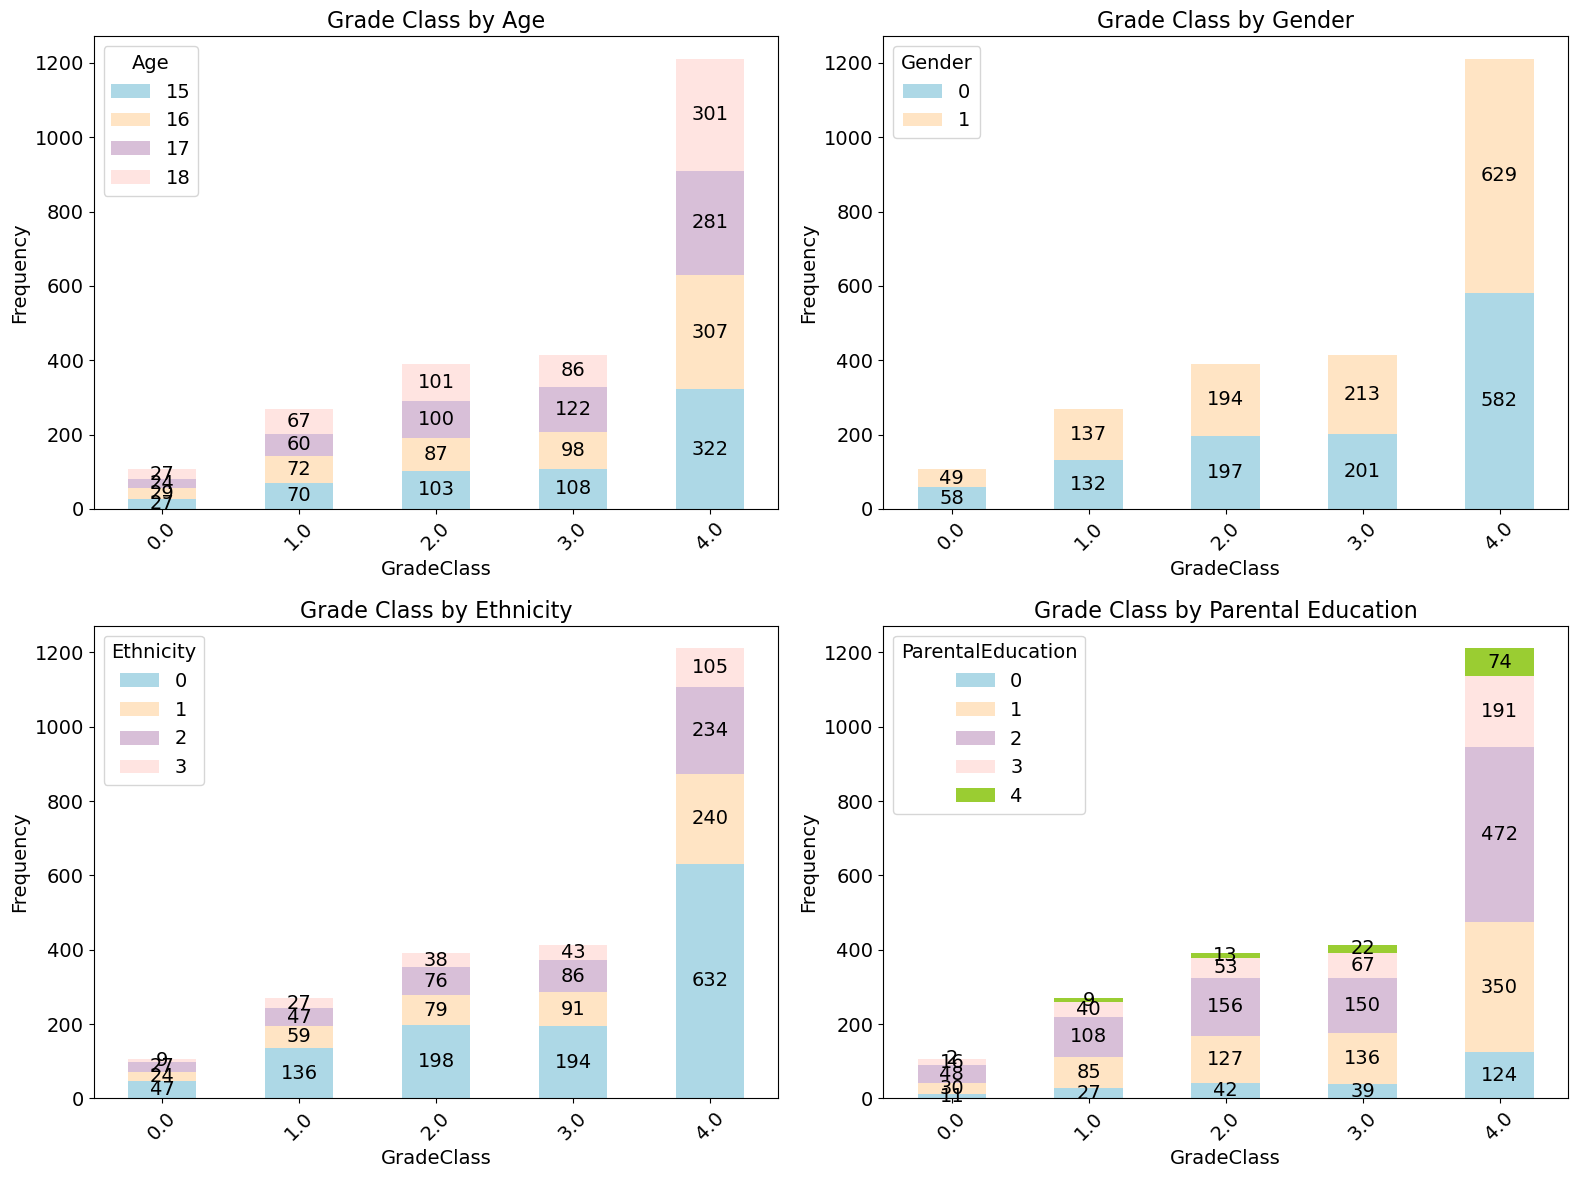

In [10]:
# defining the plots
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize=(16, 12))
plt.rc('font', size=14)

#defining color scheme so labeling is legable
colors = ['lightblue', 'bisque', 'thistle', 'mistyrose','yellowgreen']
plt.rc('axes', titlesize=16)

#------------------------------------------------------------
# Count for grade class and age
age_stack = student.groupby(['GradeClass', 'Age']).size().unstack().plot(ax=ax1, kind='bar', stacked=True, xlabel='GradeClass', 
                                                                  ylabel='Frequency', title='Grade Class by Age', rot=45, color=colors)
# adding labels for the relationship between grade class and age
for a_stacked in age_stack.containers:
    age_stack.bar_label(a_stacked, label_type='center')

#------------------------------------------------------------
# Count for grade class and gender
gen_stack = student.groupby(['GradeClass', 'Gender']).size().unstack().plot(ax=ax2, kind='bar', stacked=True, xlabel='GradeClass', 
                                                                ylabel='Frequency', title='Grade Class by Gender', rot=45, color=colors)
# adding labels
for g_stacked in gen_stack.containers:
    gen_stack.bar_label(g_stacked, label_type='center')

#------------------------------------------------------------
# Count for grade class and ethnicity
ethnicity_stack = student.groupby(['GradeClass', 'Ethnicity']).size().unstack().plot(ax=ax3, kind='bar', stacked=True, xlabel='GradeClass', 
                                                                ylabel='Frequency', title='Grade Class by Ethnicity', rot=45, color=colors)
# adding labels
for e_stacked in ethnicity_stack.containers:
    ethnicity_stack.bar_label(e_stacked, label_type='center')

#------------------------------------------------------------
# Count for grade class and parental education
pe_stack = student.groupby(['GradeClass', 'ParentalEducation']).size().unstack().plot(ax=ax4, kind='bar', stacked=True, xlabel='GradeClass', 
                                                                ylabel='Frequency', title='Grade Class by Parental Education', rot=45, color=colors)
# adding labels
for pe_stacked in pe_stack.containers:
    pe_stack.bar_label(pe_stacked, label_type='center')
    

fig.tight_layout()
plt.show()

Performing Chi-Squared test (reusing what we used in AAI500)

In [12]:
# Creating function for chi-square test to determine relationships --> reuse from AAI 500
def chisquare_test(table):
    stat, p_value, dof, expected = chi2_contingency(table, correction=False)
    # Interpret p-value
    alpha = 0.05
    print("The p-value is {}".format(p_value))
    if p_value <= alpha:
        print('Relationship between variables')
    else:
        print('NO relationship between variables.')